# Exercise 4: Saliency Maps

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy.stats as scp

%matplotlib inline

# 1. Saliency Maps from Local Standard Deviation

## 1. 

(99, 150, 3)

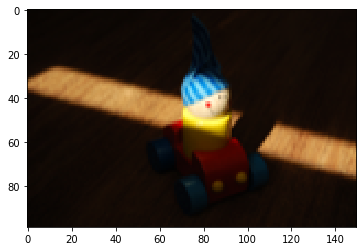

In [2]:
img = imread('salience_03.png')
plt.imshow(img)
img.shape

In [3]:
def show_components(img):
    fig, axs = plt.subplots(1, 4, figsize = (15, 10))

    axs[0].imshow(img)
    for i, ax in enumerate(axs.ravel()[1:]):
        ax.imshow(img[:, :, i], cmap = 'gray')

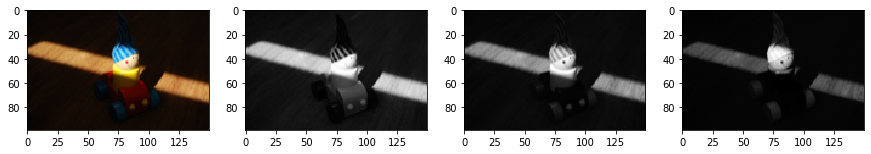

In [4]:
show_components(img)

In [5]:
red_comp = img[:, :, 0].flatten()
green_comp = img[:, :, 1].flatten()
blue_comp = img[:, :, 2].flatten()
all_comp = np.vstack((red_comp, green_comp, blue_comp))
np.corrcoef(all_comp)

array([[1.        , 0.93804716, 0.70376809],
       [0.93804716, 1.        , 0.87840858],
       [0.70376809, 0.87840858, 1.        ]])

**Is there anything striking in the correlations?**

There is very high correlation betweeen all colors, especially red and green.

**Why it is not suprising given the way natural images arise?**

Natural images have a lot of correlation between pixel values.


## 2. 

(99, 150, 3)


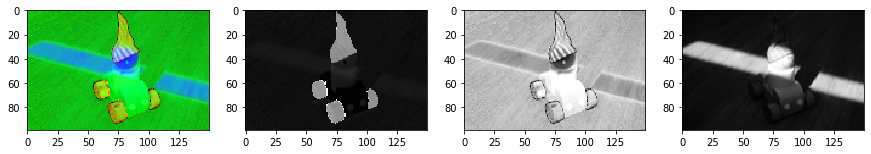

In [6]:
img_hsv = mlp.colors.rgb_to_hsv(img)
print(img_hsv.shape)
show_components(img_hsv)

In [7]:
hue_comp = img_hsv[:, :, 0].flatten()
saturation_comp = img_hsv[:, :, 1].flatten()
val_comp = img_hsv[:, :, 2].flatten()
all_comp = np.vstack((hue_comp, saturation_comp, val_comp))
np.corrcoef(all_comp)

array([[ 1.        , -0.13809205,  0.12343195],
       [-0.13809205,  1.        , -0.2804754 ],
       [ 0.12343195, -0.2804754 ,  1.        ]])

**Why is there less correlation?**

In RGB the color channels are correlated because in order to mix a certain color, the same combination needs to be used.
HSV seperates the image intensity from the color information, thus having different feature dimensions.

## 3.  & 4. 

In [8]:
def x_in_border(img, x, x_half):
    return np.all(x + x_half + 1 < img.shape[1] and x - x_half > 0)

def y_in_border(img, y, y_half):
    return np.all(y + y_half + 1 < img.shape[0] and y - y_half > 0)

In [9]:
def extract_patch(img, l_x, l_y, x, y):
    """Extract patches from the img from position x, y with length l_x and l_y, respectively.
    Returns None if parts of the patch are not within the borders."""
    
    x_half = l_x//2
    y_half = l_y//2
    
    if not x_in_border(img, x, x_half+1):
        return -17
#         return None
        
    if not y_in_border(img, y, y_half+1):
        return -17
#         return None
    
    # Cave. Assuming x should be the horizontal direction and y the vertical,
    # the accesses has to be img[y, x].
    return img[y-y_half:y+y_half+1, x-x_half:x+x_half+1]

In [10]:
hue_comp = hue_comp.reshape(img_hsv.shape[0], img_hsv.shape[1])
saturation_comp = saturation_comp.reshape(img_hsv.shape[0], img_hsv.shape[1])
val_comp = val_comp.reshape(img_hsv.shape[0], img_hsv.shape[1])
val_comp.shape

(99, 150)

In [11]:
def calc_sal_map(img_component, patch_width, use_circ_std=False):
    patch_width_sided = patch_width //2
    y_half = patch_width_sided
    x_half = patch_width_sided
    
    start_x = patch_width_sided
    stop_x = img.shape[1]-patch_width_sided
    
    start_y = patch_width_sided
    stop_y = img.shape[0]-patch_width_sided
    
    x = np.linspace(start_x, stop_x, stop_x - start_x, dtype = int)
    y = np.linspace(start_y, stop_y, stop_y - start_y, dtype = int)
    xv, yv = np.meshgrid(x, y)
    
    sal_map = []
    for x, y in zip(xv, yv):
        for xx, yy in zip(x, y):
            patch = img_component[yy-y_half:yy+y_half+1, xx-x_half:xx+x_half+1]
            if use_circ_std:
                sal_map.append(scp.circstd(patch, high = 1))
            else:
                sal_map.append(np.std(patch))
    
    return np.array(sal_map).reshape(stop_y - start_y, stop_x - start_x)

In [12]:
patch_size = 15
sal_map_hue = calc_sal_map(hue_comp, patch_size, True)
sal_map_saturation = calc_sal_map(saturation_comp, patch_size)
sal_map_val = calc_sal_map(val_comp, patch_size)

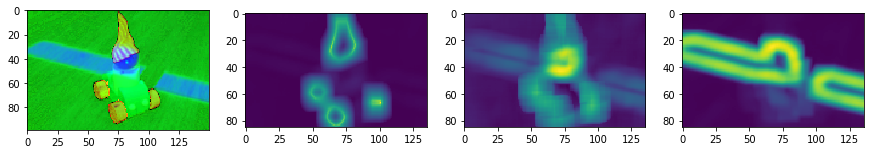

In [13]:
fig, axs = plt.subplots(1, 4, figsize = (15, 10))

axs[0].imshow(img_hsv)
axs[1].imshow(sal_map_hue)
axs[2].imshow(sal_map_saturation)
axs[3].imshow(sal_map_val)

**How is each of the images related to the visual properties of the image?**

# TODO:
